In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from scipy import stats
from sklearn import metrics

In [2]:
#Reading The CSV file
df = pd.read_csv("Retail_Sales_Data/Merged_Sales_Stores.csv")

In [3]:
df.head()

,store,dept,sale_date,weekly_sales,size
0,1,99,2012-12-10,80.00,151315
1,1,99,2012-05-10,635.00,151315
2,1,99,2012-09-14,0.03,151315
3,1,99,2012-07-09,0.05,151315
4,1,99,2012-08-31,20.06,151315


In [5]:
# Grouping the data by each stores.
sorted_store_data = df.groupby(["store"])["weekly_sales"].sum()
df_for_analysis = pd.DataFrame(sorted_store_data)

In [6]:
df_for_analysis["Total_Sales"] = pd.DataFrame(df.groupby("store")["weekly_sales"].sum())
df_for_analysis["size"] = pd.DataFrame(df.groupby("store")["size"].mean())
df_for_analysis.drop(inplace = True, columns = ["weekly_sales"])

In [9]:
df_for_analysis.head()

,Total_Sales,size
store,,
1,2.224028e+08,151315
2,2.753824e+08,202307
3,5.758674e+07,37392
4,2.995440e+08,205863
5,4.547569e+07,34875


In [24]:
size = df_for_analysis["size"]
total_sales = df_for_analysis["Total_Sales"]

#Reshape to fit into a train and test set.
X = size.values.reshape(-1, 1)
y= total_sales.values.reshape(-1, 1)

print(X.shape, y.shape)

(45, 1) (45, 1)


In [12]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [13]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [33]:
# Fit the model to the training data and calculate the scores for the training and testing data


model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
R2 = model.score(X,y)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print(f"R2 Score: {R2}")

Training Score: 0.6537732771096021
Testing Score: 0.7949545308009552
R2 Score: 0.7105126911393393


In [26]:
# Perform a linear regression on Size versus Total Sales
slope, intercept, r_value, p_value, std_err = stats.linregress(size, total_sales)

In [27]:
# Create equation of line to calculate predicted violent crime rate
fit = slope * size + intercept

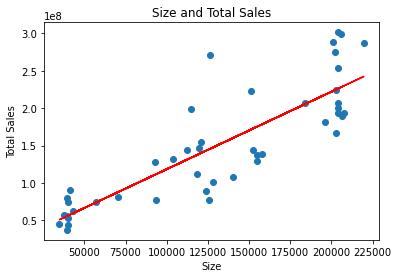

In [39]:
# Scatter plot of Size and Total Sales
plt.scatter(size, total_sales)
plt.plot(size, fit, "red")
plt.xlabel('Size')
plt.ylabel('Total Sales')
plt.title("Size and Total Sales")
plt.savefig("Images/Size_Total Sales_LinearReg")
plt.show()


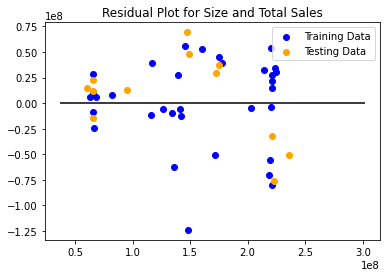

In [41]:
 # Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for Size and Total Sales")
plt.savefig("Images/Residual_Plot_Size_Sales")
